# Efficient Frontier Assignment - Submission by Eng Way

### Set-Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

directory = "C:\\Users\Eng Way's ZenBook\Dropbox\SMU\Y1S1\QF600 Asset Pricing\Session 2"

start_df=pd.read_excel('Industry_Portfolios.xlsx', sheet_name='Sheet1', index_col = 'Date')

start_df

C:\ProgramData\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


## Create a table showing the mean return and standard deviation of return for the ten industry portfolios.

In [2]:
# Calculate mean return and standard deviation of return
sample_mean = start_df.mean()
sample_std_dev = start_df.std(ddof=1)

summary_df = pd.DataFrame({
    'Mean Return': sample_mean,
    'Standard Deviation of Return': sample_std_dev
})

summary_df

,Mean Return,Standard Deviation of Return
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


## Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios.

In [3]:
# Define matrices
R = sample_mean.values
V = start_df.cov().values
e = np.ones(len(summary_df.index))

In [4]:
# Define variables using equations from slide 11
alpha = R.T @ np. linalg. inv(V) @ e
zeta = R.T @ np. linalg. inv(V) @ R
delta = e.T @ np. linalg. inv(V) @ e
# From R_mv using equations from slide 13
R_mv = alpha / delta

In [5]:
# Configure variables
R_portfolio = np.linspace(0, 2, num=201)
# Find Sigma_p using equation from slide 13
sigma2_p = 1/delta + (delta / ((zeta * delta) - alpha**2) * (R_portfolio - R_mv)**2)
sigma_p = (sigma2_p)**0.5

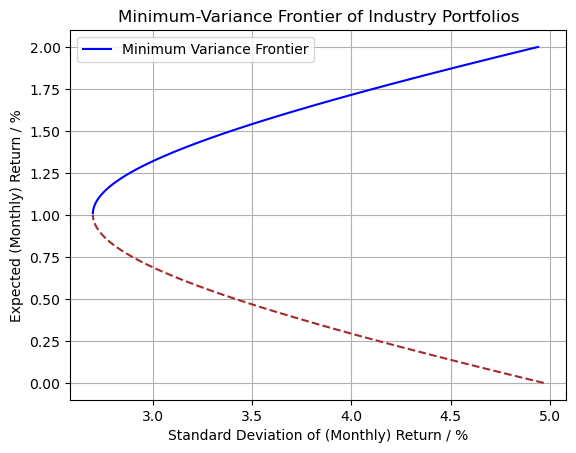

In [6]:
top_half = R_portfolio >= R_mv
bottom_half = R_portfolio < R_mv

# Plot the minimum-variance frontier
plt.plot(sigma_p[top_half], R_portfolio[top_half], label='Minimum Variance Frontier', color='blue')
plt.plot(sigma_p[bottom_half], R_portfolio[bottom_half], color='brown', linestyle='--')
plt.xlabel('Standard Deviation of (Monthly) Return / %')
plt.ylabel('Expected (Monthly) Return / %')
plt.title('Minimum-Variance Frontier of Industry Portfolios')
plt.grid(True)
plt.legend()
plt.show()

## Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.

## Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios (assuming risk-free rate is 0.13% per month).

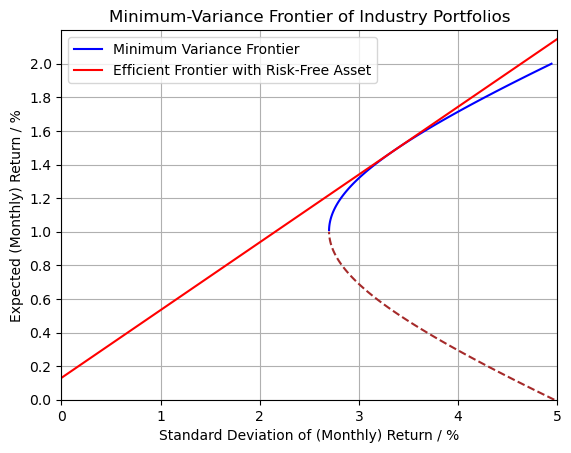

In [7]:
# Configure new variables
R_free = 0.13
sigma_p_rf = np.linspace(0, 5, num=501)
# Find R_portfolio_rf using equations from slide 20
R_portfolio_rf = R_free + (zeta - 2 * alpha * R_free + delta * R_free**2)**0.5 * sigma_p_rf


# Plot the minimum-variance frontier with the riskless asset
plt.plot(sigma_p[top_half], R_portfolio[top_half], label='Minimum Variance Frontier', color='blue')
plt.plot(sigma_p[bottom_half], R_portfolio[bottom_half], color='brown', linestyle='--')
plt.plot(sigma_p_rf, R_portfolio_rf, label="Efficient Frontier with Risk-Free Asset", color='red')
plt.xlabel('Standard Deviation of (Monthly) Return / %')
plt.ylabel('Expected (Monthly) Return / %')
plt.title('Minimum-Variance Frontier of Industry Portfolios')
plt.xlim(0, 5)
plt.ylim(0, 2.2)
plt.yticks(np.arange(0,2.2,0.2))
plt.grid(True)
plt.legend()
plt.show()

## Briefly explain the economic significance and relevance of the efficient frontier to an investor.

## Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.

Since two frontiers will intersect at single point representing the tangency portfolio.

In [8]:
# Find Sharpe ratio for tangency portfolio
R_tg = ((alpha * R_free) - zeta) / ((delta * R_free) - alpha)
sharpe_ratio = round((zeta - (2 * alpha * R_free) + (delta * R_free**2))**0.5,5)

"""
Alternatively:
R_tg = ((alpha * R_free) - zeta) / ((delta * R_free) - alpha)
sigma_tg = -(zeta - (2 * alpha * R_free) + (delta * R_free**2))**0.5 / (delta * (R_free - R_mv))
sharpe_ratio = round(((R_tg - R_free) / sigma_tg),5)
"""

print('The Sharpe ratio of the tangency portfolio is {}'.format(sharpe_ratio))

The Sharpe ratio of the tangency portfolio is 0.40357


In [9]:
# Find w* using equations from slide 12
w_star = ((delta * R_tg) - alpha) / ((zeta * delta) - alpha**2) * np.linalg.inv(V) @ R + ((zeta - alpha) * R_tg) / ((zeta * delta) - alpha**2) * np.linalg.inv(V) @ e

end_df = pd.DataFrame({
    'Weights': w_star,
    'Mean Return': sample_mean,
    'Standard Deviation of Return': sample_std_dev
})
    
end_df 

,Weights,Mean Return,Standard Deviation of Return
NoDur,1.464441,0.902833,3.345657
Durbl,-0.394765,0.733333,8.361852
Manuf,0.464941,1.012833,5.310270
Enrgy,0.213408,1.231167,6.081524
HiTec,-0.485013,0.766250,5.381191
Telcm,-0.341547,0.881417,4.448284
Shops,1.963556,0.916333,4.093786
Hlth,0.311293,0.783833,3.787172
Utils,0.652754,0.907167,3.701763
Other,-1.199741,0.489083,5.582452


## Briefly explain the economic significance and relevance of thetangency portfolio to an investor.